In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import locale
from locale import atof

In [2]:

df_World_Bank =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/World_bank_USA/API_USA_DS2_en_csv_v2.csv', index_col = 0, header= 2, sep=",", engine = 'python', na_filter = False, thousands=',')

In [3]:
df_2016_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm16nat/oesm16nat/national_M2016_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2015_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm15nat/oesm15nat/national_M2015_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2014_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm14nat/oesm14nat/national_M2014_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2013_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm13nat/oesm13nat/national_M2013_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2012_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm12nat/oesm12nat/national_M2012_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2011_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm11nat/national_M2011_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2010_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm10nat/national_M2010_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2009_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm09nat/national_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')

df_2008_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm08nat/national__M2008_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2007_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm07nat/national_May2007_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2006_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm06nat/national_may2006_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2005_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm05nat/national_may2005_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2004_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm04nat/national_may2004_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2003_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oesm03nat/national_may2003_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_2002_unedited =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Capstone_2/oes02nat/national_2002_dl.csv', index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')


In [4]:
# function to clean up, set read-able column titles, and add year, so I can concatenate into one DF w/out loosing data


# function to clean up, set read-able column titles, and add year, so I can concatenate into one DF w/out loosing data
# function is allowing me stem and put all words in categories into lowercase, and translate needed numerical terms to numerical forms
# and create a employment percent column for each job type in the given year, before correlating all these DF into one doc

from nltk.stem import WordNetLemmatizer
from nltk.tokenize.moses import MosesDetokenizer
lemmatizer = nltk.stem.WordNetLemmatizer()
detokenizer = MosesDetokenizer()

def clean_labor_df(df, year):
    df= df.reset_index()
    df.columns= ['OCC_Code','Occupation_title','OCC_group', 'total_employment', 'Employment_RSE', 'mean_hourly_wage','mean_annual_wage', 'mean_wage_RSE', 'hourly_10th_percentile_wage', 'hourly_25th_percentile_wage', 'hourly_median_wage', 'hourly 75_percentile_wage', 'hourly_90th_percentile_wage', 'annual_10th_percentile_wage', 'annual_25th_percentile_wage', 'annual_median_percentile_wage', 'annual_75th_percentile_wage', 'annual_90th_percentile_wage', 'Annual:T/F', 'Wage:T/F' ]
    df['Year']= year
    df1= df.drop(['Annual:T/F', 'Wage:T/F'], axis=1)
    df2=df1.replace('**', np.nan)
    df3= df2.replace('#', np.nan)
    df3['total_employment']=pd.to_numeric(df3['total_employment'], errors='coerce', downcast='float')
    df3['mean_hourly_wage']= pd.to_numeric(df3['mean_hourly_wage'], errors='coerce', downcast='float')
    df3['mean_annual_wage']= pd.to_numeric(df3['mean_annual_wage'], errors='coerce', downcast='float')
    df3['hourly_median_wage']= pd.to_numeric(df3['hourly_median_wage'], errors='coerce', downcast='float')
    total_employ= df3['total_employment'][df3['Occupation_title']=='All Occupations']
    df3['job_employ_percent']= df3['total_employment']/ total_employ[0]
    # stem and tokenize jobt titles
    df3['Occupation_title'] = df3['Occupation_title'].str.lower()
    df3['Occupation_title'] = df3['Occupation_title'].apply(
        lambda x : x.split(" ")).apply(lambda x : [lemmatizer.lemmatize(y) for y in x])
    # detokenize titles
    df3['Occupation_title'] = df3['Occupation_title'].apply(lambda x :[detokenizer.detokenize(x, return_str=True)])
    df3['Occupation_title'] = df3['Occupation_title'].astype(str)
    df3['Occupation_title'] = df3['Occupation_title'].map(lambda x: x.lstrip("(){}[] ' ").
                                                   rstrip("''(){}[] "))
    df3= df3.replace('computer and mathematical science occupation', 'computer and mathematical occupation')
    
    
    return df3

In [5]:
# second function for  the multivalue index in 2006 data
def clean_labor_df2(df, year):
    df.columns= df.columns.get_level_values(0)
    df= df.reset_index()
    df.columns= ['OCC_Code','Occupation_title','OCC_group', 'total_employment', 'Employment_RSE', 'mean_hourly_wage','mean_annual_wage', 'mean_wage_RSE', 'hourly_10th_percentile_wage', 'hourly_25th_percentile_wage', 'hourly_median_wage', 'hourly 75_percentile_wage', 'hourly_90th_percentile_wage', 'annual_10th_percentile_wage', 'annual_25th_percentile_wage', 'annual_median_percentile_wage', 'annual_75th_percentile_wage', 'annual_90th_percentile_wage', 'Annual:T/F', 'Wage:T/F' ]
    df['Year']= year
    df1= df.drop(['Annual:T/F', 'Wage:T/F'], axis=1)
    df2=df1.replace('**', np.nan)
    df3= df2.replace('#', np.nan)
    df3['total_employment']=pd.to_numeric(df3['total_employment'], errors='coerce', downcast='float')
    df3['mean_hourly_wage']= pd.to_numeric(df3['mean_hourly_wage'], errors='coerce', downcast='float')
    df3['mean_annual_wage']= pd.to_numeric(df3['mean_annual_wage'], errors='coerce', downcast='float')
    df3['hourly_median_wage']= pd.to_numeric(df3['hourly_median_wage'], errors='coerce', downcast='float')
    total_employ= df3['total_employment'][df3['Occupation_title']=='All Occupations']
    df3['job_employ_percent']= df3['total_employment']/ total_employ[0]
    # stem and tokenize jobt titles
    df3['Occupation_title'] = df3['Occupation_title'].str.lower()
    df3['Occupation_title'] = df3['Occupation_title'].apply(
        lambda x : x.split(" ")).apply(lambda x : [lemmatizer.lemmatize(y) for y in x])
    # detokenize titles
    df3['Occupation_title'] = df3['Occupation_title'].apply(lambda x :[detokenizer.detokenize(x, return_str=True)])
    df3['Occupation_title'] = df3['Occupation_title'].astype(str)
    df3['Occupation_title'] = df3['Occupation_title'].map(lambda x: x.lstrip("(){}[] ' ").
                                                   rstrip("''(){}[] "))
    

    return df3

In [6]:
# second function for  the multivalue index and missing data in 2003 and 2002
def clean_labor_df3(df, year):

    df= df.reset_index()
    df.columns= ['OCC_Code','Occupation_title','OCC_group', 'total_employment', 'Employment_RSE', 'mean_hourly_wage','mean_annual_wage', 'mean_wage_RSE', 'hourly_10th_percentile_wage', 'hourly_25th_percentile_wage', 'hourly_median_wage', 'hourly 75_percentile_wage', 'hourly_90th_percentile_wage', 'annual_10th_percentile_wage', 'annual_25th_percentile_wage', 'annual_median_percentile_wage', 'annual_75th_percentile_wage', 'annual_90th_percentile_wage', 'Annual:T/F']
    df['Year']= year
    df1= df.drop(['Annual:T/F'], axis=1)
    df2=df1.replace('**', np.nan)
    df3= df2.replace('#', np.nan)
    df3['total_employment']=pd.to_numeric(df3['total_employment'], errors='coerce', downcast='float')
    df3['mean_hourly_wage']= pd.to_numeric(df3['mean_hourly_wage'], errors='coerce', downcast='float')
    df3['mean_annual_wage']= pd.to_numeric(df3['mean_annual_wage'], errors='coerce', downcast='float')
    df3['hourly_median_wage']= pd.to_numeric(df3['hourly_median_wage'], errors='coerce', downcast='float')
    total_employ= df3['total_employment'][df3['Occupation_title']=='All Occupations']
    df3['job_employ_percent']= df3['total_employment']/ total_employ[0]
        # stem and tokenize jobt titles
    df3['Occupation_title'] = df3['Occupation_title'].str.lower()
    df3['Occupation_title'] = df3['Occupation_title'].apply(
        lambda x : x.split(" ")).apply(lambda x : [lemmatizer.lemmatize(y) for y in x])
    # detokenize titles
    df3['Occupation_title'] = df3['Occupation_title'].apply(lambda x :[detokenizer.detokenize(x, return_str=True)])
    df3['Occupation_title'] = df3['Occupation_title'].astype(str)
    df3['Occupation_title'] = df3['Occupation_title'].map(lambda x: x.lstrip("(){}[] ' ").
                                                   rstrip("''(){}[] "))
    

    return df3

In [7]:
df_2016= clean_labor_df(df_2016_unedited, '2016')
df_2015= clean_labor_df(df_2015_unedited, '2015')
df_2014= clean_labor_df(df_2014_unedited, '2014')
df_2013= clean_labor_df(df_2013_unedited, '2013')
df_2012= clean_labor_df(df_2012_unedited, '2012')
df_2011= clean_labor_df(df_2011_unedited, '2011')
df_2010= clean_labor_df(df_2010_unedited, '2010')
df_2009= clean_labor_df(df_2009_unedited, '2009')
df_2008= clean_labor_df(df_2008_unedited, '2008')
df_2007= clean_labor_df(df_2007_unedited, '2007')
df_2006= clean_labor_df2(df_2006_unedited, '2006')
df_2005= clean_labor_df(df_2005_unedited, '2005')
df_2004= clean_labor_df(df_2004_unedited, '2004')
df_2003= clean_labor_df3(df_2003_unedited, '2003')
df_2002= clean_labor_df3(df_2002_unedited, '2002')

In [8]:
all_list= (df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016)
df_all_labor= pd.concat(all_list)

Note for reference from Data source: 
occ_group: Shows the SOC occupation level: "total"=total of all occupations; "major"=SOC major group; "minor"=SOC minor group; "broad"=SOC broad occupation; "detailed"=SOC detailed occupation

In [9]:
# isolating the total list by only the major job types
df_all_major= df_all_labor.loc[df_all_labor['OCC_group']== 'major' ]
df_all_broad= df_all_labor.loc[df_all_labor['OCC_group']== 'broad' ]

# Incorperate GDP data
isolate GDP from the world bank data by year, switch column and row, and join to existing df along year listing as GDP column

In [10]:
df_WB_GDP_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'GDP per capita (current US$)']
df_WB_GDP_growth_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'GDP growth (annual %)']
df_WB_GDP_worker_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'GDP per person employed (constant 2011 PPP $)']


df_WB_selfemployed_per_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'Self-employed, total (% of total employment) (modeled ILO estimate)']
df_WB_maleselfemployed_per_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'Self-employed, male (% of male employment) (modeled ILO estimate)']
df_WB_femaleselfemployed_per_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'Self-employed, female (% of female employment) (modeled ILO estimate)']

df_WB_unemploymentper_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'Unemployment, total (% of total labor force) (national estimate)']
df_WB_male_unemploymentper_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'Unemployment, male (% of male labor force) (national estimate)']
df_WB_female_unemploymentper_unedited= df_World_Bank.loc[df_World_Bank['Indicator Name'] == 'Unemployment, female (% of female labor force) (national estimate)']


In [11]:
# clean and transpose the DF so years are rows then concat into one DF
def clean_WB(df):
    df.columns= df.columns.get_level_values(0)
    df1= df.reset_index()
    df2= df1.drop(['Indicator Code', 'Country Code', 'Country Name'], axis= 1)
    df3= df2.transpose()
    return df3    

In [12]:
df_WB1= clean_WB(df_WB_GDP_unedited)
df_WB2= clean_WB(df_WB_GDP_growth_unedited)
df_WB3= clean_WB(df_WB_GDP_worker_unedited)

df_WB4= clean_WB(df_WB_selfemployed_per_unedited)
df_WB5= clean_WB(df_WB_maleselfemployed_per_unedited)
df_WB6=clean_WB(df_WB_femaleselfemployed_per_unedited)

df_WB7=clean_WB(df_WB_unemploymentper_unedited)
df_WB8=clean_WB(df_WB_male_unemploymentper_unedited)
df_WB9=clean_WB(df_WB_female_unemploymentper_unedited)

In [13]:
all_df= [df_WB1, df_WB2, df_WB3, df_WB4, df_WB5, df_WB6, df_WB7, df_WB8, df_WB9]

df_WB_GDP_plus= pd.concat(all_df, axis=1, join='inner')
df_WB_GDP_plus= df_WB_GDP_plus.drop(df_WB_GDP_plus.index[0])
df_WB_GDP_plus= df_WB_GDP_plus.reset_index()
df_WB_GDP_plus= df_WB_GDP_plus.drop(df_WB_GDP_plus.index[::58])
df_WB_GDP_plus.columns= ('Year', 'GDP per capita (current US$)','GDP growth (annual %)', 'GDP per person employed (constant 2011 PPP$)', 
                        '% of self-employed workers(all)', '% of self-employed male workers(% of all male workers)', 
                         '% of self-employed female workers (% of all female workers)', 'Unemployment, total (% of total labor force)', 
                        'Unemployment, male (% of male labor force)', 'Unemployment, female (% of female labor force)')
# only interestd in data from 2002 on
df_WB_GDP_recent= df_WB_GDP_plus.drop(df_WB_GDP_plus.index[0:42])
df_WB_GDP_recent

,Year,GDP per capita (current US$),GDP growth (annual %),GDP per person employed (constant 2011 PPP$),% of self-employed workers(all),% of self-employed male workers(% of all male workers),% of self-employed female workers (% of all female workers),"Unemployment, total (% of total labor force)","Unemployment, male (% of male labor force)","Unemployment, female (% of female labor force)"
43,2003,39677.1983481058,2.80677595648093,97912,11.3000001907349,13.8000001907349,8.30000019073486,6,6.30000019073486,5.69999980926514
44,2004,41921.8097617892,3.78574284969444,100435,11.1999998092651,13.8000001907349,8.30000019073486,5.5,5.59999990463257,5.40000009536743
45,2005,44307.9205848603,3.34521606334877,102124,11.1000003814697,13.6000003814697,8,5.09999990463257,5.09999990463257,5.09999990463257
46,2006,46437.0671173065,2.666625826122,103062,10.8999996185303,13.3999996185303,8,4.59999990463257,4.59999990463257,4.59999990463257
47,2007,48061.5376613353,1.77857023965289,104015,10.6999998092651,13.1000003814697,7.80000019073486,4.59999990463257,4.69999980926514,4.5
48,2008,48401.4273403899,-0.291621458693953,103863,10.3999996185303,12.8999996185303,7.5,5.80000019073486,6.09999990463257,5.40000009536743
49,2009,47001.5553496818,-2.77552957416808,104800,10.6000003814697,13.1000003814697,7.69999980926514,9.19999980926514,10.3000001907349,8.10000038146973
50,2010,48373.8788155779,2.53192061616315,107956,10.6999998092651,13.1999998092651,7.80000019073486,9.60000038146973,10.5,8.60000038146973
51,2011,49790.6654782305,1.60145467247139,108733,10.3999996185303,12.8000001907349,7.59999990463257,9,9.39999961853027,8.5
52,2012,51450.1222950581,2.22403085385714,109261,10.3999996185303,12.6000003814697,7.80000019073486,8.10000038146973,8.19999980926514,7.90000009536743


In [14]:
df_WB_GDP_recent.head(1)

,Year,GDP per capita (current US$),GDP growth (annual %),GDP per person employed (constant 2011 PPP$),% of self-employed workers(all),% of self-employed male workers(% of all male workers),% of self-employed female workers (% of all female workers),"Unemployment, total (% of total labor force)","Unemployment, male (% of male labor force)","Unemployment, female (% of female labor force)"
43,2003,39677.1983481058,2.80677595648093,97912,11.3000001907349,13.8000001907349,8.30000019073486,6,6.30000019073486,5.69999980926514


In [15]:
df_WB_GDP_recent['GDP per capita (current US$)']= pd.to_numeric(df_WB_GDP_recent['GDP per capita (current US$)'], errors='coerce', downcast='float')
df_WB_GDP_recent['GDP growth (annual %)']= pd.to_numeric(df_WB_GDP_recent['GDP growth (annual %)'], errors='coerce')
df_WB_GDP_recent['GDP per person employed (constant 2011 PPP$)']= pd.to_numeric(df_WB_GDP_recent['GDP per person employed (constant 2011 PPP$)'], errors='coerce')

df_WB_GDP_recent['% of self-employed workers(all)']= pd.to_numeric(df_WB_GDP_recent['% of self-employed workers(all)'], errors='coerce')
df_WB_GDP_recent['% of self-employed male workers(% of all male workers)']= pd.to_numeric(df_WB_GDP_recent['% of self-employed male workers(% of all male workers)'], errors='coerce')
df_WB_GDP_recent['% of self-employed female workers (% of all female workers)']= pd.to_numeric(df_WB_GDP_recent['% of self-employed female workers (% of all female workers)'], errors='coerce')

df_WB_GDP_recent['Unemployment, total (% of total labor force)']= pd.to_numeric(df_WB_GDP_recent['Unemployment, total (% of total labor force)'], errors='coerce')
df_WB_GDP_recent['Unemployment, male (% of male labor force)']= pd.to_numeric(df_WB_GDP_recent['Unemployment, male (% of male labor force)'], errors='coerce')
df_WB_GDP_recent['Unemployment, male (% of female labor force)']= pd.to_numeric(df_WB_GDP_recent['Unemployment, female (% of female labor force)'], errors='coerce')
df_WB_GDP_recent.head(3)

,Year,GDP per capita (current US$),GDP growth (annual %),GDP per person employed (constant 2011 PPP$),% of self-employed workers(all),% of self-employed male workers(% of all male workers),% of self-employed female workers (% of all female workers),"Unemployment, total (% of total labor force)","Unemployment, male (% of male labor force)","Unemployment, female (% of female labor force)","Unemployment, male (% of female labor force)"
43,2003,39677.199219,2.806776,97912,11.3,13.8,8.3,6.0,6.3,5.69999980926514,5.7
44,2004,41921.808594,3.785743,100435,11.2,13.8,8.3,5.5,5.6,5.40000009536743,5.4
45,2005,44307.921875,3.345216,102124,11.1,13.6,8.0,5.1,5.1,5.09999990463257,5.1


In [16]:
# merging the two dataframes into one
df_GDP_salary= pd.merge(df_WB_GDP_recent, df_all_labor, left_on= 'Year', right_on='Year')

In [17]:
df_all_index= df_GDP_salary[['Occupation_title','mean_annual_wage', 'job_employ_percent', 'total_employment', 
                              'Year', 'GDP per person employed (constant 2011 PPP$)', 'GDP per capita (current US$)',
                             'GDP growth (annual %)', 'Unemployment, total (% of total labor force)', 'OCC_group']].copy()

In [18]:
df_all_index["mean_employment"]= df_all_index['mean_annual_wage']/df_all_index['total_employment']
df_all_index["mean_percent"]= df_all_index['mean_annual_wage']/(df_all_index['job_employ_percent'])
df_all_index["percent_mean"]=df_all_index['job_employ_percent']/df_all_index['mean_annual_wage']
df_all_index["employment_mean"]=df_all_index['total_employment']/df_all_index['mean_annual_wage']
df_all_indexs= df_all_index.copy()
df_all_indexs['Occupation_title'] = df_all_indexs['Occupation_title'].map(lambda x: x.rstrip('occupation'))

In [19]:
# manually isolated the location of nested groups for each larger-category
df_bus_fin= df_all_indexs.iloc[31:58]
df_life_phys_soc_sci= df_all_indexs.iloc[74:106]
df_comm_soc_ser= df_all_indexs.iloc[107:142]
df_legal= df_all_indexs.iloc[143:156]
df_edu_lib= df_all_indexs.iloc[157:165]
df_art_design_entertain_spor= df_all_indexs.iloc[166:221]
df_health_pract_tech= df_all_indexs.iloc[222:255]
df_healthcare_support= df_all_indexs.iloc[256:299]
df_protec_serv= df_all_indexs.iloc[300:314]

In [20]:
# selected groups for deep dive- in just 2003 list

df_manag_03 =df_all_indexs.iloc[2:30]
df_off_admin_03= df_all_indexs.iloc[412:464]
df_food_prep_serv_03= df_all_indexs.iloc[334:349]

df_production_03= df_all_indexs.iloc[583:687] 
df_trans_material_moving_03= df_all_indexs.iloc[689:734]  
df_construct_03= df_all_indexs.iloc[478:532]  

df_pers_are_serv_03= df_all_indexs.iloc[359:390]  
df_comp_math_03=df_all_indexs.iloc[59:73]
df_sales_03=df_all_indexs.iloc[391:410]

df_farm_fish_forest_03=df_sales=df_all_indexs.iloc[465:476]
df_instal_repair_03=df_all_indexs.iloc[533:581]

In [21]:
# using titles for detailed and major groups within each group from the 2003 list above- to make the total list
df_manag= df_all_indexs[df_all_indexs['Occupation_title'].isin(df_manag_03['Occupation_title'])]
df_off_admin= df_all_indexs[df_all_indexs['Occupation_title'].isin(df_off_admin_03['Occupation_title'])]
df_food_prep_serv= df_all_indexs[df_all_indexs['Occupation_title'].isin(df_food_prep_serv_03['Occupation_title'])]

df_production= df_all_indexs[df_all_indexs['Occupation_title'].isin(df_production_03['Occupation_title'])]
df_trans_material_moving= df_all_indexs[df_all_indexs['Occupation_title'].isin(df_trans_material_moving_03['Occupation_title'])]
df_construct= df_all_indexs[df_all_indexs['Occupation_title'].isin(df_construct_03['Occupation_title'])]

df_pers_are_serv= df_all_indexs[df_all_indexs['Occupation_title'].isin(df_pers_are_serv_03['Occupation_title'])]
df_comp_math= df_all_indexs[df_all_indexs['Occupation_title'].isin(df_comp_math_03['Occupation_title'])]
df_sales= df_all_indexs[df_all_indexs['Occupation_title'].isin(df_sales_03['Occupation_title'])]

df_farm_fish_forest= df_all_indexs[df_all_indexs['Occupation_title'].isin(df_farm_fish_forest_03['Occupation_title'])]
df_instal_repair= df_all_indexs[df_all_indexs['Occupation_title'].isin(df_instal_repair_03['Occupation_title'])]


In [22]:
 df_manag['mean_employment']=   df_manag.mean_annual_wage/  df_manag.total_employment

df_manag_b= df_manag.loc[df_manag['OCC_group']== 'broad']
df_manag_d= df_manag.loc[df_manag['OCC_group']== 'detailed']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
 df_construct['mean_employment']=  df_construct.mean_annual_wage/ df_construct.total_employment

df_cons_b= df_construct.loc[df_construct['OCC_group']== 'broad']
df_cons_d= df_construct.loc[df_construct['OCC_group']== 'detailed']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# General Economy graphs

# Regression Analysis- Machine Learning

hypothesis: I can use the Mean Wage/ Employment Index used above with GDP per capita/ Unemployment percent to create a prediction model that given the second (national data)  I can create estimates of the first in the different indusitries. 

In [24]:
# look at mean_percent as a y measurment to other factors

In [25]:
df_indexs= df_GDP_salary[['Occupation_title','mean_annual_wage', 'job_employ_percent', 'total_employment',
                          'Year', 'OCC_group', 'GDP per capita (current US$)','Unemployment, total (% of total labor force)'
                         ,'% of self-employed workers(all)' ]].copy()
df_indexs['Occupation_title'] = df_indexs['Occupation_title'].map(lambda x: x.rstrip('occupation'))
df_indexs["mean_employment"]= df_indexs['mean_annual_wage']/df_indexs['total_employment']
df_indexs["mean_percent"]= df_indexs['mean_annual_wage']/(df_indexs['job_employ_percent'])
df_indexs["percent_mean"]=df_indexs['job_employ_percent']/df_indexs['mean_annual_wage']
df_indexs["employment_mean"]=df_indexs['total_employment']/df_indexs['mean_annual_wage']
df_indexs['GDP_percent']= df_indexs['GDP per capita (current US$)']/df_indexs['job_employ_percent']
df_indexs['GDP_unemployment']= df_indexs['GDP per capita (current US$)']/df_indexs['Unemployment, total (% of total labor force)']

In [26]:
df_m_indexs= df_indexs.loc[df_indexs['OCC_group']== 'major' ]
df_b_indexs= df_indexs.loc[df_indexs['OCC_group']== 'broad' ]
df_d_indexs= df_indexs.loc[df_indexs['OCC_group']== 'detailed' ]

In [27]:
df_b_indexs.head(3)

,Occupation_title,mean_annual_wage,job_employ_percent,total_employment,Year,OCC_group,GDP per capita (current US$),"Unemployment, total (% of total labor force)",% of self-employed workers(all),mean_employment,mean_percent,percent_mean,employment_mean,GDP_percent,GDP_unemployment
7311,chief executive,176840.0,0.001964,255940.0,2012,broad,51450.121094,8.1,10.4,0.690943,90021392.0,1.110847e-08,1.447297,26190972.0,6351.866503
7313,general and operation manager,114850.0,0.014579,1899460.0,2012,broad,51450.121094,8.1,10.4,0.060465,7877787.5,1.269392e-07,16.538616,3529065.0,6351.866503
7315,legislator,38590.0,0.000436,56760.0,2012,broad,51450.121094,8.1,10.4,0.679880,88580024.0,1.128923e-08,1.470847,118099320.0,6351.866503


In [28]:
# use broad listing for a large enough dataset to analyze- and compare with the seperated broad list already considered 
# mean_wage for a job predicted by GDP over percent fo the job  market the job represents
# Or use Major listings and create 6 independent regression machine predictive models 

In [29]:
X= df_b_indexs.drop('mean_annual_wage' , axis=1).values
y= df_b_indexs['mean_annual_wage'].values

In [30]:
X_GDP_unem= X[:,12]
X_GDP_unem= X_GDP_unem.reshape(-1, 1)
y= y.reshape(-1, 1)

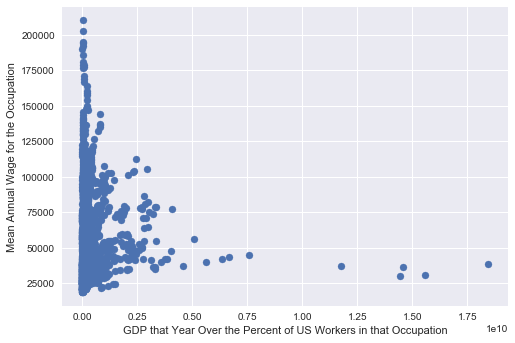

In [31]:
plt.scatter(X_GDP_unem, y)
plt.xlabel('GDP that Year Over the Percent of US Workers in that Occupation')
plt.ylabel('Mean Annual Wage for the Occupation')
plt.show()

In [32]:
X= df_m_indexs.drop('mean_annual_wage' , axis=1).values
y= df_m_indexs['mean_annual_wage'].values

In [33]:
X_GDP_unem= X[:,12]
X_GDP_unem= X_GDP_unem.reshape(-1, 1)
y= y.reshape(-1, 1)

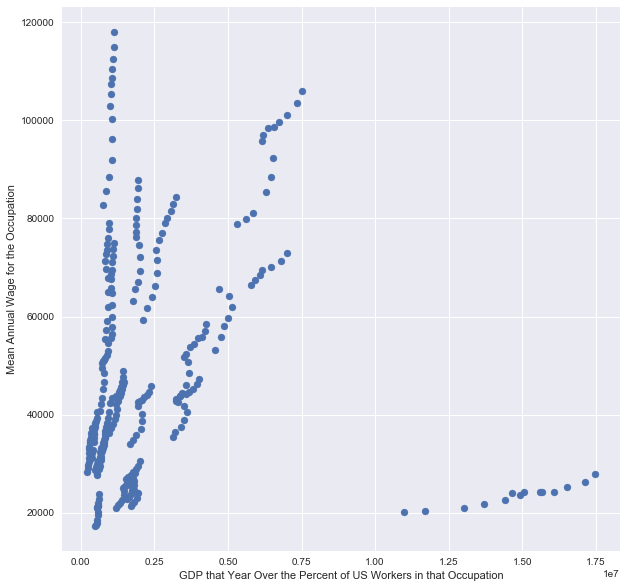

In [259]:
plt.scatter(X_GDP_unem, y)
plt.xlabel('GDP that Year Over the Percent of US Workers in that Occupation')
plt.ylabel('Mean Annual Wage for the Occupation')
plt.show()

# Analysis thought - Machine Learning to help understand?
could certain occupations work as markers for GDP or unemployment rate?
hypothesis from earlier analysis: construction and/or food

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Construction

In [37]:
df_cons_b['GDP_unemployment']= df_cons_b['GDP per capita (current US$)']/df_cons_b['Unemployment, total (% of total labor force)']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_cons_b.describe()

,mean_annual_wage,job_employ_percent,total_employment,GDP per person employed (constant 2011 PPP$),GDP per capita (current US$),GDP growth (annual %),"Unemployment, total (% of total labor force)",mean_employment,mean_percent,percent_mean,employment_mean,GDP_unemployment
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,1.200000e+02,120.000000,120.000000
mean,46770.582031,0.000916,123885.664062,110672.800000,54588.523438,2.163484,6.380000,2.321838,3.145621e+08,2.117045e-08,2.862311,8941.777123
std,10022.922852,0.001621,219628.218750,1046.924023,2286.896240,0.522165,1.220663,2.816548,3.841737e+08,4.011260e-08,5.424952,2052.512403
min,32410.000000,0.000027,3630.000000,109261.000000,51450.121094,1.485279,4.900000,0.041179,5.517236e+06,4.816976e-10,0.067630,6351.866503
25%,38127.500000,0.000136,18295.000000,109874.000000,52787.027344,1.677332,5.300000,0.484188,6.535353e+07,2.483382e-09,0.332124,7133.381982
50%,45245.000000,0.000243,32260.000000,110579.000000,54598.550781,2.224031,6.200000,1.207673,1.573449e+08,6.395004e-09,0.833190,8806.218139
75%,53570.000000,0.000701,95632.500000,111561.000000,56469.007812,2.569194,7.400000,3.012936,4.027448e+08,1.550035e-08,2.091044,10654.529393
max,77350.000000,0.006496,912100.000000,112089.000000,57638.160156,2.861587,8.100000,14.786260,2.075991e+09,1.812502e-07,24.283995,11762.889599


In [39]:
X= df_cons_b.drop('job_employ_percent' , axis=1).values
y= df_cons_b['job_employ_percent'].values

X_cons= X[:,1]

X_cons= X_cons.reshape(-1, 1)
y_cons= y.reshape(-1, 1)

In [41]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()

In [42]:
reg.fit(X_cons, y_cons)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
prediction_space= np.linspace(min(X_cons), max(X_cons)).reshape(-1,1)

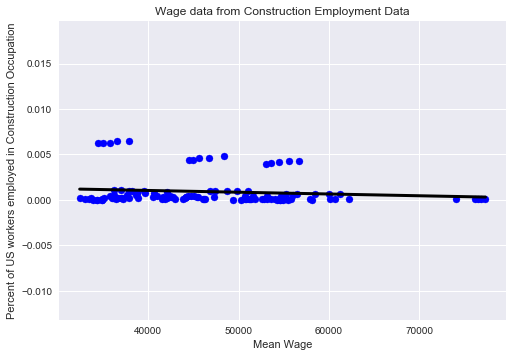

In [44]:
plt.scatter(X_cons, y_cons, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), 
         color='black', linewidth=3)
plt.title('Wage data from Construction Employment Data')
plt.ylabel('Percent of US workers employed in Construction Occupation')
plt.xlabel('Mean Wage')
plt.show()

In [45]:
# test-train split used to score prediction results against actual results
X_train, X_test, y_train, y_test = train_test_split(X_cons, y_cons, test_size=0.33, random_state=42) #split data
reg= LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

-0.038939835702189507

Not a Good fit. Not at all. Likely due to the outlier career results identified earlier: rock splitters- quarry, explosive workers, and electrician

In [46]:
df_cons_b

,Occupation_title,mean_annual_wage,job_employ_percent,total_employment,Year,GDP per person employed (constant 2011 PPP$),GDP per capita (current US$),GDP growth (annual %),"Unemployment, total (% of total labor force)",OCC_group,mean_employment,mean_percent,percent_mean,employment_mean,GDP_unemployment
8262,boilermakers,55830.0,0.000136,17660.0,2012,109261,51450.121094,2.224031,8.1,broad,3.161382,4.118891e+08,2.427838e-09,0.316317,6351.866503
8267,carpenter,44520.0,0.004358,567820.0,2012,109261,51450.121094,2.224031,8.1,broad,0.078405,1.021522e+07,9.789311e-08,12.754268,6351.866503
8277,construction laborer,34490.0,0.006251,814470.0,2012,109261,51450.121094,2.224031,8.1,broad,0.042347,5.517236e+06,1.812502e-07,23.614672,6351.866503
8286,electr,53030.0,0.003990,519850.0,2012,109261,51450.121094,2.224031,8.1,broad,0.102010,1.329067e+07,7.524073e-08,9.802941,6351.866503
8288,glazier,42090.0,0.000325,42350.0,2012,109261,51450.121094,2.224031,8.1,broad,0.993861,1.294878e+08,7.722734e-09,1.006177,6351.866503
8290,insulation worker,41000.0,0.000390,50760.0,2012,109261,51450.121094,2.224031,8.1,broad,0.807723,1.052363e+08,9.502423e-09,1.238049,6351.866503
8299,plasterer and stucco mas,41860.0,0.000161,21040.0,2012,109261,51450.121094,2.224031,8.1,broad,1.989544,2.592131e+08,3.857830e-09,0.502628,6351.866503
8301,reinforcing iron and rebar worker,51140.0,0.000118,15330.0,2012,109261,51450.121094,2.224031,8.1,broad,3.335943,4.346323e+08,2.300796e-09,0.299765,6351.866503
8303,roofer,38760.0,0.000749,97650.0,2012,109261,51450.121094,2.224031,8.1,broad,0.396928,5.171481e+07,1.933682e-08,2.519350,6351.866503
8305,sheet metal worker,46870.0,0.001024,133420.0,2012,109261,51450.121094,2.224031,8.1,broad,0.351297,4.576963e+07,2.184855e-08,2.846597,6351.866503


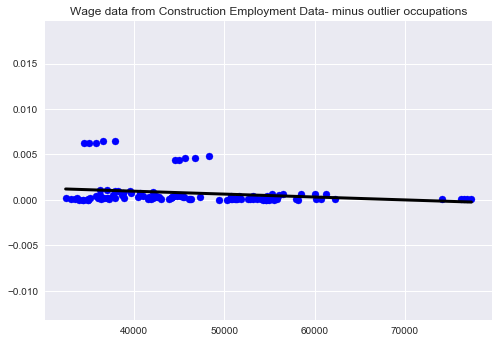

In [49]:
# same thing as above w/ df loosing the outliers
df_cons_out= df_cons_b[df_cons_b.Occupation_title != 'sheet metal worker']
df_cons_out= df_cons_out[df_cons_out.Occupation_title != 'explosive workers, ordnance handling experts, and blasters']
df_cons_out= df_cons_out[df_cons_out.Occupation_title != 'electr']


X= df_cons_out.drop('job_employ_percent' , axis=1).values
y= df_cons_out['job_employ_percent'].values

X_cons= X[:,1]

X_cons= X_cons.reshape(-1, 1)
y_cons= y.reshape(-1, 1)

reg.fit(X_cons, y_cons)
prediction_space= np.linspace(min(X_cons), max(X_cons)).reshape(-1,1)

plt.scatter(X_cons, y_cons, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), 
         color='black', linewidth=3)
plt.title('Wage data from Construction Employment Data- minus outlier occupations')
plt.show()

In [50]:
# test-train split used to score prediction results against actual results
X_train, X_test, y_train, y_test = train_test_split(X_cons, y_cons, test_size=0.33, random_state=42) #split data
reg= LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.010519336312907357

Although better, still a bad fit- and only eliminated one of the numerical outliers from this group by isolating the two outliers previously identified.

# Major Groups

In [51]:
df_f_index= df_m_indexs.loc[df_m_indexs['Occupation_title']== 'food preparation and serving related ']
df_c_index= df_m_indexs.loc[df_m_indexs['Occupation_title']== 'construction and extraction ']

df_cf_index= df_f_index.append(df_c_index)

In [66]:
df_c_index.head(1)

,Occupation_title,mean_annual_wage,job_employ_percent,total_employment,Year,OCC_group,GDP per capita (current US$),"Unemployment, total (% of total labor force)",% of self-employed workers(all),mean_employment,mean_percent,percent_mean,employment_mean,GDP_percent,GDP_unemployment
477,construction and extraction,36650.0,0.047704,6085510.0,2003,major,39677.199219,6.0,11.3,0.006023,768278.0625,0.000001,166.04393,831735.9375,6612.866536


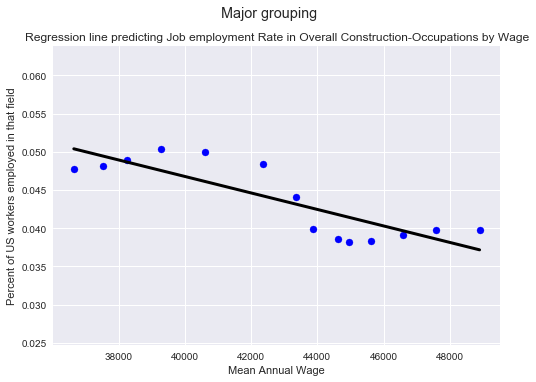

In [64]:
X= df_c_index.drop('job_employ_percent', axis=1).values
y= df_c_index['job_employ_percent'].values

X_all= X[:,1]

X_all= X_all.reshape(-1, 1)
y_all= y.reshape(-1, 1)

reg.fit(X_all, y_all)

prediction_space= np.linspace(min(X_all), max(X_all)).reshape(-1,1)

plt.scatter(X_all, y_all, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), 
         color='black', linewidth=3)
plt.title('Regression line predicting Job employment Rate in Overall Construction-Occupations by Wage')
plt.suptitle('Major grouping')
plt.xlabel('Mean Annual Wage')
plt.ylabel('Percent of US workers employed in that field')
plt.show()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.33, random_state=42) #split data
reg= LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.60109700346929429

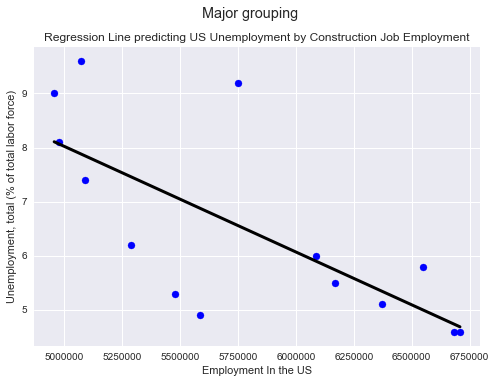

In [80]:
X= df_c_index.drop('Unemployment, total (% of total labor force)', axis=1).values
y= df_c_index['Unemployment, total (% of total labor force)'].values

X_all= X[:,3]

X_all= X_all.reshape(-1, 1)
y_all= y.reshape(-1, 1)

reg.fit(X_all, y_all)

prediction_space= np.linspace(min(X_all), max(X_all)).reshape(-1,1)

plt.scatter(X_all, y_all, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), 
         color='black', linewidth=3)
plt.title('Regression Line predicting US Unemployment by Construction Job Employment')
plt.suptitle('Major grouping')
plt.xlabel('Employment In the US')
plt.ylabel('Unemployment, total (% of total labor force)')
plt.show()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.33, random_state=42) #split data
reg= LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

-0.97430526266541839

In [82]:
# Food and construction together as predictors of macro-economic data points

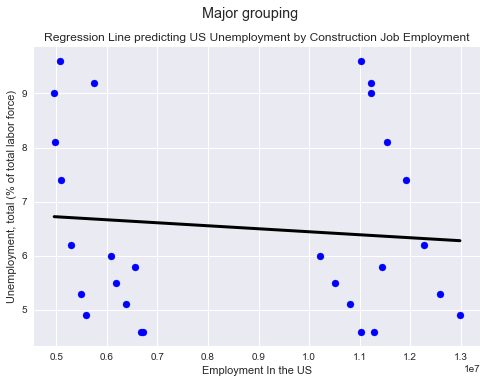

In [83]:
X= df_cf_index.drop('Unemployment, total (% of total labor force)', axis=1).values
y= df_cf_index['Unemployment, total (% of total labor force)'].values

X_all= X[:,3]

X_all= X_all.reshape(-1, 1)
y_all= y.reshape(-1, 1)

reg.fit(X_all, y_all)

prediction_space= np.linspace(min(X_all), max(X_all)).reshape(-1,1)

plt.scatter(X_all, y_all, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), 
         color='black', linewidth=3)
plt.title('Regression Line predicting US Unemployment by Construction Job Employment')
plt.suptitle('Major grouping')
plt.xlabel('Employment In the US')
plt.ylabel('Unemployment, total (% of total labor force)')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.33, random_state=42) #split data
reg= LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

In [67]:
# All Major Group Data Together
X= df_m_indexs.drop('job_employ_percent', axis=1).values
y= df_m_indexs['job_employ_percent'].values

X_all= X[:,1]

X_all= X_all.reshape(-1, 1)
y_all= y.reshape(-1, 1)

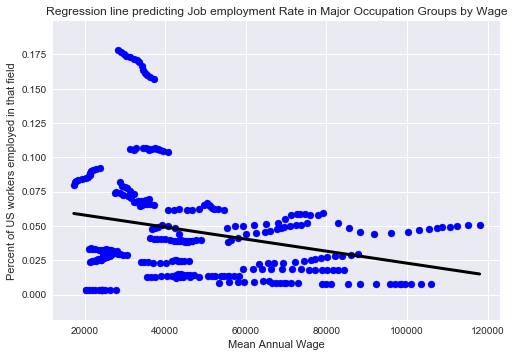

In [61]:
reg.fit(X_all, y_all)

prediction_space= np.linspace(min(X_all), max(X_all)).reshape(-1,1)

plt.scatter(X_all, y_all, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), 
         color='black', linewidth=3)
plt.title('Regression line predicting Job employment Rate in Major Occupation Groups by Wage')
plt.xlabel('Mean Annual Wage')
plt.ylabel('Percent of US workers employed in that field')
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.33, random_state=42) #split data
reg= LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.080952352365568747

Management wage to employment percent varies so much that the linear regression predictive model is a very poor fit

# Food Services

In [56]:
X= df_f_index.drop('job_employ_percent', axis=1).values
y= df_f_index['job_employ_percent'].values

X_all= X[:,1]

X_all= X_all.reshape(-1, 1)
y_all= y.reshape(-1, 1)

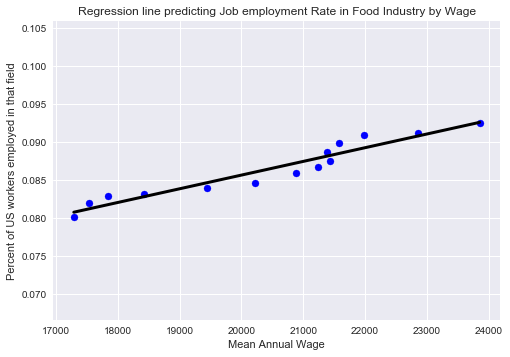

In [57]:
reg.fit(X_all, y_all)

prediction_space= np.linspace(min(X_all), max(X_all)).reshape(-1,1)

plt.scatter(X_all, y_all, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), 
         color='black', linewidth=3)
plt.title('Regression line predicting Job employment Rate in Food Industry by Wage')
plt.xlabel('Mean Annual Wage')
plt.ylabel('Percent of US workers employed in that field')
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.33, random_state=42) #split data
reg= LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.90023029103256824

The quick regression results look like there is a strong correlation for food-servers. But to make the best model I need to identify the method. Due to the nature of the data ( non-binary results) and type of results I am looking for, I am limiting my machine learning techniques to supervised methods looking at non-binary effects. Specifically, linear regression modeling, Lasso regression and Ridge. 

# National Econ markers by Specific Employment markets

In [307]:
df_cons_b.head(1)

,Occupation_title,mean_annual_wage,job_employ_percent,total_employment,Year,GDP per person employed (constant 2011 PPP$),GDP per capita (current US$),GDP growth (annual %),"Unemployment, total (% of total labor force)",OCC_group,mean_employment,mean_percent,percent_mean,employment_mean,GDP_percent,GDP_unemployment
8262,boilermakers,55830.0,0.000136,17660.0,2012,109261,51450.121094,2.224031,8.1,broad,3.161382,411889120.0,2.427838e-09,0.316317,379576320.0,6351.866503


In [315]:
df_reg_cons_b= df_cons_b[['mean_annual_wage', 'job_employ_percent', 
                          'Unemployment, total (% of total labor force)', 
                          'GDP per capita (current US$)', 'GDP growth (annual %)']].copy()
df_reg_cons_b["mean_percent"]= df_reg_cons_b['mean_annual_wage']/(df_reg_cons_b['job_employ_percent'])
df_testing= df_cons_b.copy()
df_testing= df_testing.replace(np.nan, '0')
df_testing= df_testing.replace(np.inf, '0')

In [316]:
df_reg_cons_b.head(1)

,mean_annual_wage,job_employ_percent,"Unemployment, total (% of total labor force)",GDP per capita (current US$),GDP growth (annual %),mean_percent
8262,55830.0,0.000136,8.1,51450.121094,2.224031,411889120.0


In [318]:
X= df_reg_cons_b.drop('Unemployment, total (% of total labor force)', axis=1).values
y= df_reg_cons_b['Unemployment, total (% of total labor force)'].values

X_all= X[:,1]

X_all= X_all.reshape(-1, 1)
y_all= y.reshape(-1, 1)

In [319]:
# construction group
# putting the X and Y values into matrix for scoring and analysis
X= df_reg_cons_b.as_matrix(columns= ['mean_annual_wage'])
y= df_reg_cons_b.as_matrix(columns=['Unemployment, total (% of total labor force'])

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.33, random_state=42) #split data
reg= LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

-0.0438794639478719

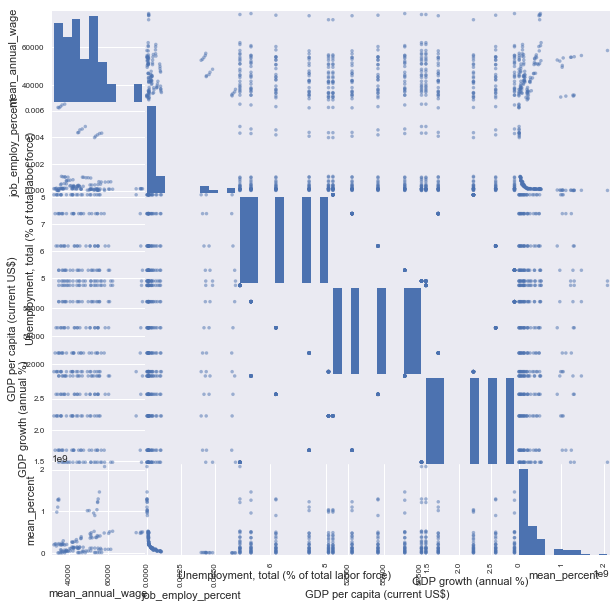

In [317]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_reg_cons_b)
plt.show()